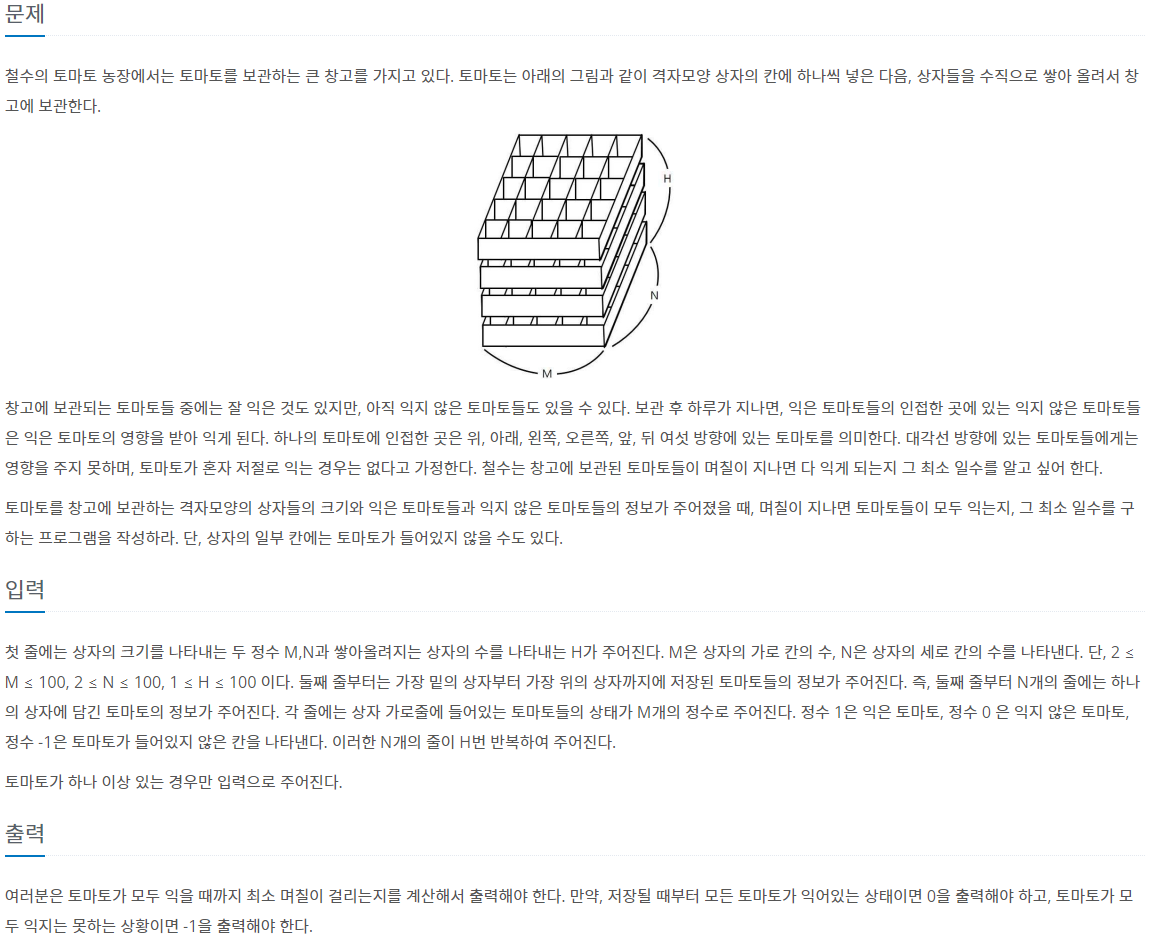

In [ ]:
from collections import deque


def bfs(n, m, h):
    visited = [[[0] * m for _ in range(n)] for _ in range(h)]
    q = deque()
    cnt = 0         # 안 익은 토마토 있는지?
    for i in range(n):
        for j in range(m):
            for k in range(h):
                if tomato[k][i][j] == 1:
                    q.append((k, i, j))
                elif not tomato[k][i][j]:
                    cnt += 1
    if not cnt and len(q) > 0:
        return 0
    while q:
        k, i, j = q.popleft()
        for dk, di, dj in [[0, -1, 0], [0, 0, -1], [0, 0, 1], [0, 1, 0], [-1, 0, 0], [1, 0, 0]]:
            nk, ni, nj = k + dk, i + di, j + dj
            if 0 <= nk < h and 0 <= ni < n and 0 <= nj < m and tomato[nk][ni][nj] == 0 and visited[nk][ni][nj] == 0:
                q.append((nk, ni, nj))
                visited[nk][ni][nj] = visited[k][i][j] + 1
    day = 0
    for i in range(n):
        for j in range(m):
            for k in range(h):
                if tomato[k][i][j] == 0:
                    if visited[k][i][j] == 0:
                        return -1          # 아직도 안 익었어?
                    elif day < visited[k][i][j]:
                        day = visited[k][i][j]
    return day


m, n, h = map(int, input().split())
tomato = [[list(map(int, input().split())) for _ in range(n)] for _ in range(h)]
print(bfs(n, m, h))

---

7576_토마토 문제에서 3차원배열 추가버전 h 를 층 변수로 입력받았으며 가장 먼저 조사해야하는 값이기에 3중 포문 맨 안에 h 위치 시키고 배열은 맨 앞에 두었음. visited[h][n][m] 이런식. 유효성검사는 3차원이기에 6방향으로 설정<br>나머지 알고리즘은 토마토와 동일